In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
IMAGE_SIZE = [224, 224]

train_data_dir = 'gdrive/My Drive/Kaggle/data/train'
validation_data_dir = 'gdrive/My Drive/Kaggle/data/validation'

In [6]:
irnv = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in irnv.layers:
  layer.trainable = False

219062272/219055592 [==============================] - 2s 0us/step


In [7]:
folders = glob('gdrive/My Drive/Kaggle/data/train/*')
print(len(folders))

2


In [8]:
# our layers - you can add more if you want
x = Flatten()(irnv.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=irnv.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
64/64 [==============================] - 676s 11s/step - loss: 0.3087 - accuracy: 0.9731 - val_loss: 0.4047 - val_accuracy: 0.9832
Epoch 2/5
64/64 [==============================] - 661s 10s/step - loss: 0.2998 - accuracy: 0.9814 - val_loss: 0.2602 - val_accuracy: 0.9868
Epoch 3/5
64/64 [==============================] - 662s 10s/step - loss: 0.2047 - accuracy: 0.9873 - val_loss: 0.3391 - val_accuracy: 0.9796
Epoch 4/5
64/64 [==============================] - 662s 10s/step - loss: 0.1942 - accuracy: 0.9888 - val_loss: 0.2180 - val_accuracy: 0.9880
Epoch 5/5
64/64 [==============================] - 661s 10s/step - loss: 0.0971 - accuracy: 0.9946 - val_loss: 0.2768 - val_accuracy: 0.9904


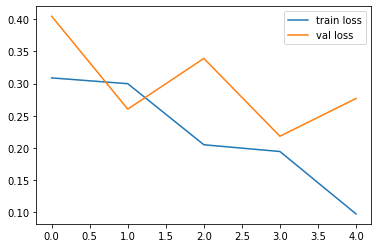

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

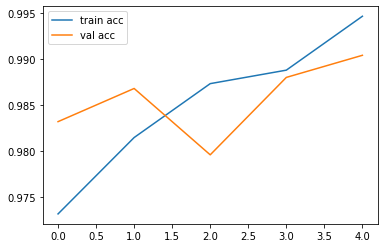

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()